## Drowsiness detection algorithm using the pre-trained model from Mobilenet

In [44]:
# Import dependencies
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## The images have different sizes

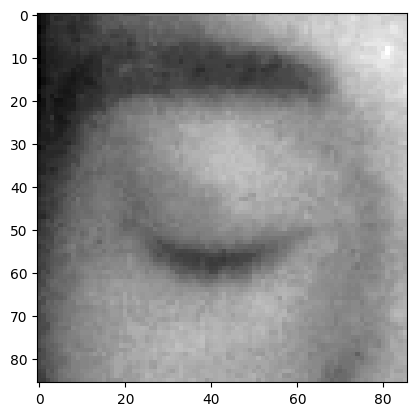

In [45]:
# Look at a single image of the training data
img_array = cv2.imread('./train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap="gray")



In [46]:
Datadirectory = './train'
Classes = ['Closed_Eyes', 'Open_Eyes']
# Datadirectory = 'dataset_new/train/'
# Classes = ['Closed', 'Open']
# For each of the categories
for category in Classes:
  # Get the path to the category
  path = os.path.join(Datadirectory, category)
  
  # Print the amount of images in the category
  print(f'{category} category has {len(os.listdir(path))} images')
  
  # Print the maximal size of the images
  print('The images have a size of:')
  min_size = 10000
  max_size = 0
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    
    if img_array.shape[0] < min_size:
      min_size = img_array.shape[0]
      
    if img_array.shape[0] > max_size:
      max_size = img_array.shape[1]
      
  # Print the minimal size of the images
  print(f' The minimal size of {category} is {min_size} x {min_size}')
  
  # Print the maximal size of the images
  print(f' The maximal size of {category} is {max_size} x {max_size}')

Closed_Eyes category has 2000 images
The images have a size of:
 The minimal size of Closed_Eyes is 65 x 65
 The maximal size of Closed_Eyes is 180 x 180
Open_Eyes category has 2000 images
The images have a size of:
 The minimal size of Open_Eyes is 60 x 60
 The maximal size of Open_Eyes is 179 x 179


In [47]:
# Define the size of each of the images
images_size = 224

In [48]:
def create_training_data(training_data, size_of_images=images_size):
    # For each of the categories
    for category in Classes:
        # Get the path to the category
        path = os.path.join(Datadirectory, category)
        
        # Get the index of the class, 0 for closed eyes and 1 for open eyes
        class_index = Classes.index(category)
        
        # For each image first conert it to the size and grayscale, then add it to the training data
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            new_array = cv2.resize(backtorgb, (size_of_images, size_of_images))
            training_data.append([new_array, class_index])
            
    return training_data
            
# Create the training dataset using shuffled samples
training_data = create_training_data([])

In [49]:
# Get the size of the training data
print(len(training_data))

4000


In [50]:
# Shuffle the data
import random
random.shuffle(training_data)

In [51]:
#here we reshape the image.
X = []
y = []

# For each feature and label in the training data
for features, label in training_data:
  X.append(features)
  y.append(label)

# Reshape the features into a numpy array that works with tensorflow
X = np.array(X).reshape(-1, images_size, images_size, 3)

# Normalize the features
X = X/255.0

# Convert the labels to a numpy array that works with tensorflow
Y = np.array(y)

## Creating the model using a pre-trained model

In [52]:
model = tf.keras.applications.mobilenet.MobileNet()

In [53]:
# Get an idea of the model
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [60]:
# Get the input and output dimensions of the model
input_shape = model.layers[0].input
output_shape = model.layers[-4].output

In [61]:
Flat_layer = layers.Flatten()(output_shape)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)
model = keras.Model(inputs = input_shape, outputs = final_output)
model.summary()

# Compile the model using adam as optimizer and binary crossentropy as loss function
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Fit the model on the training data using two epochs and a validation split of 10%
model.fit(X, Y, epochs = 2, validation_split = 0.1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       


                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128       
 zation)                                                         
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)      0         
                                                                 
 conv_pw_1 (Conv2D)          (None, 112, 112, 64)      2048      
          

In [63]:
# Save the new model
new_model.save('model.h5')

C:\Users\MAL Sevenhuijsen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
